In [62]:
import json

# Load the JSON data
def read_json(file): #'Chinese16\Chinese16_000000000000_keypoints.json'
    with open(file, 'r') as file:
        data = json.load(file)

    # Extract part_candidates
    part_candidates = data['part_candidates'][0]

    # Print the extracted part_candidates
    # print("Part Candidates:")
    # for key, value in part_candidates.items():
        # print(f"Part {key}: {value}")
    return part_candidates

{0,  "Nose"},
{1,  "Neck"},
{2,  "RShoulder"},
{3,  "RElbow"},
{4,  "RWrist"},
{5,  "LShoulder"},
{6,  "LElbow"},
{7,  "LWrist"},
{8,  "MidHip"},
{9,  "RHip"},
{10, "RKnee"},
{11, "RAnkle"},
{12, "LHip"},
{13, "LKnee"},
{14, "LAnkle"},
{15, "REye"},
{16, "LEye"},
{17, "REar"},
{18, "LEar"},
{19, "LBigToe"},
{20, "LSmallToe"},
{21, "LHeel"},
{22, "RBigToe"},
{23, "RSmallToe"},
{24, "RHeel"},
{25, "Background"}

                Initial_side    Vertex          Terminal_Side
0   0-1-2       Nose            Neck            RShoulder
1   0-1-5       Nose            Neck            LShoulder
2   1-2-3       Neck            RShoulder       RElbow
3   1-5-6       Neck            LShoulder       LElbow
4   2-3-4       RShoulder       RElbow          RWrist
5   5-6-7       LShoulder       LElbow          LWrist
6   9-2-3       RHip            RShoulder       RElbow
7   12-5-6      LHip            LShoulder       LElbow
8   8-9-2       MidHip          RHip            RShoulder
9   8-12-5      MidHip          LHip            LShoulder
10  8-9-10      MidHip          RHip            RKnee
11  8-12-13     MidHip          LHip            LKnee
12  9-10-11     RHip            RKnee           RAnkle
13  12-13-14    LHip            LKnee           LAnkle
14  10-11-22    RKnee           RAnkle          RBigToe
15  13-14-19    LKnee           LAnkle          LBigToe

In [63]:
                # Initial_side    Vertex          Terminal_Side",
"Nose-Neck-RShoulder",
"Nose-Neck-LShoulder",
"Neck-RShoulder-RElbow",
"Neck-LShoulder-LElbow",
"RShoulder-RElbow-RWrist",
"LShoulder-LElbow-LWrist",
"RHip-RShoulder-RElbow",
"LHip-LShoulder-LElbow",
"MidHip-RHip-RShoulder",
"MidHip-LHip-LShoulder",
"MidHip-RHip-RKnee",
"MidHip-LHip-LKnee",
"RHip-RKnee-RAnkle",
"LHip-LKnee-LAnkle",
"RKnee-RAnkle-RBigToe",
"LKnee-LAnkle-LBigToe"

'LKnee-LAnkle-LBigToe'

In [64]:
angle_indices = [
    ['0', '1', '2'],
    ['0', '1', '5'],
    ['1', '2', '3'],
    ['1', '5', '6'],
    ['2', '3', '4'],
    ['5', '6', '7'],
    ['9', '2', '3'],
    ['12', '5', '6'],
    ['8', '9', '2'],
    ['8', '12', '5'],
    ['8', '9', '10'],
    ['8', '12', '13'],
    ['9', '10', '11'],
    ['12', '13', '14'],
    ['10', '11', '22'],
    ['13', '14', '19']
]

import math
def calculate_angle(initial_side, vertex, terminal_side):
    # Calculate the vectors representing the initial side and terminal side
    vector1 = (initial_side[0] - vertex[0], initial_side[1] - vertex[1])
    vector2 = (terminal_side[0] - vertex[0], terminal_side[1] - vertex[1])
    # Calculate the dot product of the two vectors
    dot_product = vector1[0] * vector2[0] + vector1[1] * vector2[1]
    # Calculate the magnitudes of the vectors
    magnitude1 = math.sqrt(vector1[0] ** 2 + vector1[1] ** 2)
    magnitude2 = math.sqrt(vector2[0] ** 2 + vector2[1] ** 2)
    # Calculate the angle between the two vectors using arctangent
    angle_rad = math.acos(dot_product / (magnitude1 * magnitude2))
    angle_deg = math.degrees(angle_rad)
    return angle_deg

def calculate_angles(part_candidates):
    angles = []
    for angle_index in angle_indices:
        angles.append(calculate_angle(
            [part_candidates[angle_index[0]][0], part_candidates[angle_index[0]][1]],
            [part_candidates[angle_index[1]][0], part_candidates[angle_index[1]][1]],
            [part_candidates[angle_index[2]][0], part_candidates[angle_index[2]][1]]
        ))
    
    midhip_x = parts_candidates["8"][0]
    midhip_y = parts_candidates["8"][1]
    angles.append(midhip_x)
    angles.append(midhip_y)
    return angles

import os
import pandas as pd
directory = "Chinese16"
df = pd.DataFrame(
    columns= [
        "Nose-Neck-RShoulder",
        "Nose-Neck-LShoulder",
        "Neck-RShoulder-RElbow",
        "Neck-LShoulder-LElbow",
        "RShoulder-RElbow-RWrist",
        "LShoulder-LElbow-LWrist",
        "RHip-RShoulder-RElbow",
        "LHip-LShoulder-LElbow",
        "MidHip-RHip-RShoulder",
        "MidHip-LHip-LShoulder",
        "MidHip-RHip-RKnee",
        "MidHip-LHip-LKnee",
        "RHip-RKnee-RAnkle",
        "LHip-LKnee-LAnkle",
        "RKnee-RAnkle-RBigToe",
        "LKnee-LAnkle-LBigToe",
        "MidHip-X",
        "MidHip-Y"
    ]
)
# midhip_x = []
# midhip_y = []
for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    # print(calculate_angles(read_json(filepath)))
    parts_candidates = read_json(filepath)
    # print(calculate_angles(parts_candidates))
    df.loc[len(df)] = calculate_angles(parts_candidates)

# read_json(filepath)
df.to_csv("output.csv")

In [76]:
# Hyperparameters
sigma = 1
# threshold = 0.000001 #0.001
thresh_indiv = 1
thresh_all = 10
# alpha = 0.0000001
window_size = 5

# STEP 1: Calculate the gradients
derivs = df.diff()

# STEP 2: Apply Gaussian filter with appropriate sigma.
from skimage import filters
for column in derivs.columns:
    derivs[column] = filters.gaussian(derivs[column], sigma=sigma)

derivs.dropna(inplace=True)
derivs.to_csv("derivs.csv")

# STEP 3: Calculate Harris cornerness score for all pixels.
#   !!always ignores max derivatives for x, y because it's on a different scale than angles!!
def sum_over_threshold(row):
    return row[row > thresh_indiv].sum()
sums = derivs.apply(sum_over_threshold, axis=1)
# print(sums)
derivs['sum'] = sums

 # STEP 4: Peak local max to eliminate clusters. (Try different parameters.)
derivs['max_sum'] = derivs['sum'].rolling(window=window_size, center=True).max()
derives_filtered = derivs[(derivs['sum'] >= thresh_all) & (derivs['sum'] == derivs['max_sum'])]
derives_filtered.drop(columns=['sum', 'max_sum'], inplace=True)

print(derives_filtered)

     Nose-Neck-RShoulder  Nose-Neck-LShoulder  Neck-RShoulder-RElbow  \
36              3.106535             1.177796               2.705285   
40              0.918097            -0.327822              -0.579267   
45             -0.919601             0.997032              -1.419363   
65              0.007599             1.018773              -1.379618   
70              0.321129            -0.024254              -0.173405   
79             -0.169430            -0.962178               0.120394   
87              0.807530            -0.825301               1.457913   
93             -1.385670             1.406852              -0.878952   
97              2.013502            -1.118201               0.750407   
106            -0.932428             0.086733               0.043415   
112             2.969626            -1.586469              -1.638399   
117            -0.069325            -1.527738               2.786576   
122            -0.566613             0.160702               1.76

C:\Users\Anna_Guo\AppData\Local\Temp\ipykernel_11420\591036345.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  derives_filtered.drop(columns=['sum', 'max_sum'], inplace=True)


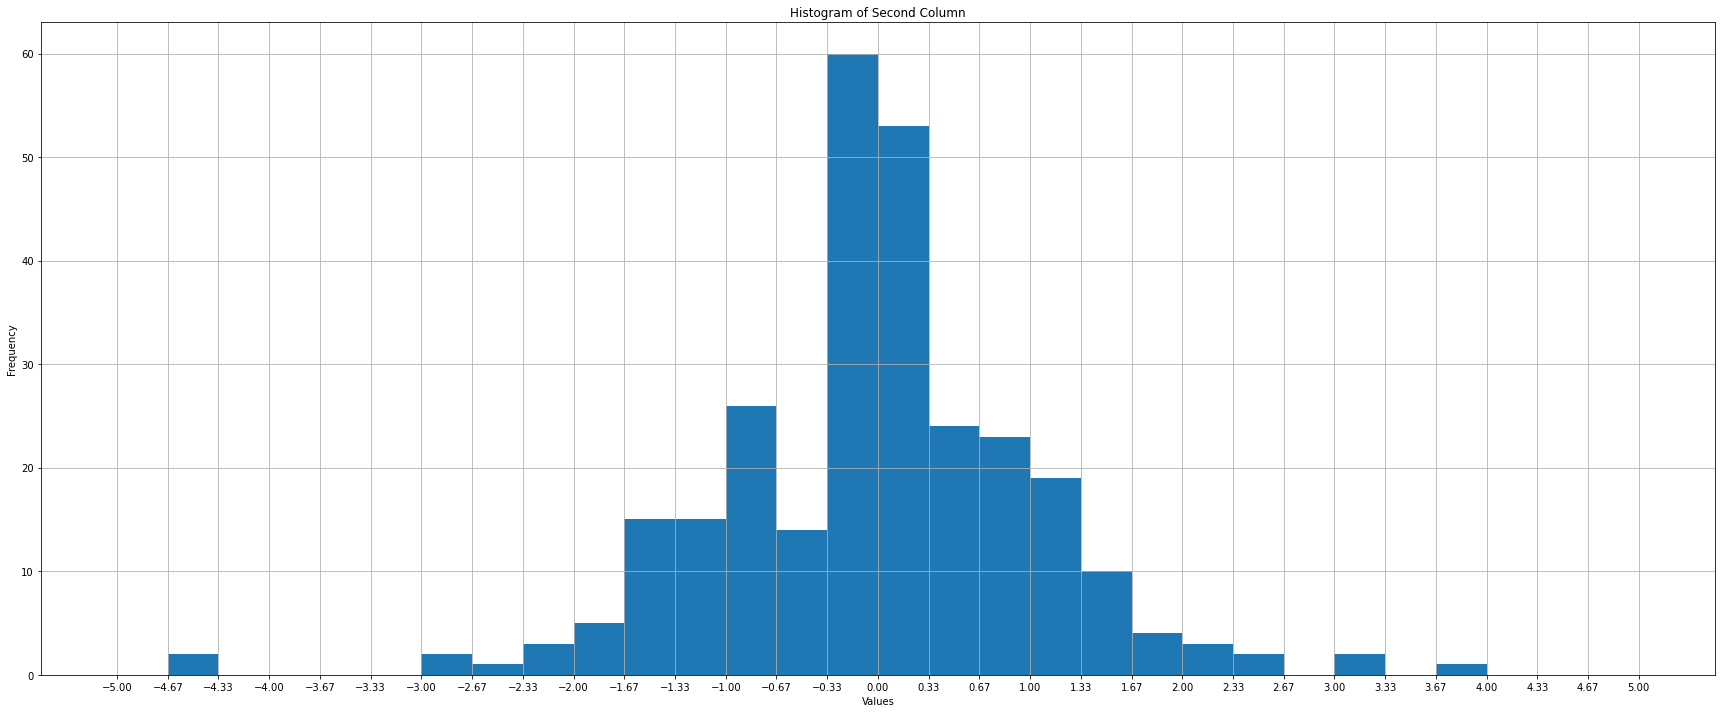

In [66]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 12))
max_abs_value = 5
bin_cnt = 30
bin_bounds = [-max_abs_value + i * (2 * max_abs_value / bin_cnt) for i in range(bin_cnt+1)]
hist, bins, _ = plt.hist(derivs["Nose-Neck-LShoulder"], bins=bin_bounds)  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Second Column')
plt.grid(True)  # Add grid
plt.xticks(bins)
plt.show()

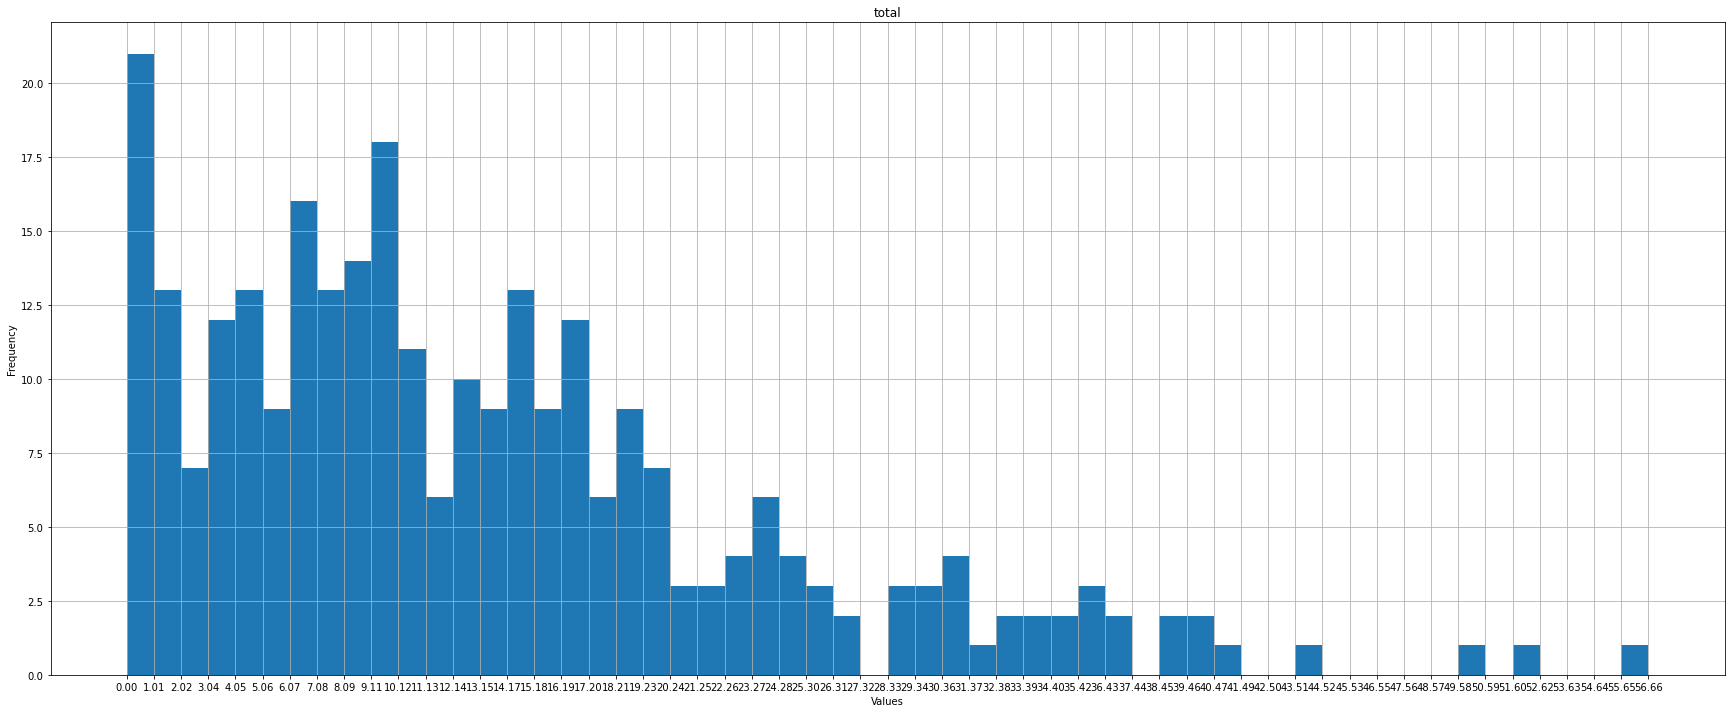

In [67]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 12))
max_abs_value = 5
bin_cnt = 30
hist, bins, _ = plt.hist(result, 56)  # Adjust the number of bins as needed
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('total')
plt.grid(True)  # Add grid
plt.xticks(bins)
plt.show()

In [68]:
def reorganize_sets(msets):
    # Initialize the reorganized sets
    reorganized_sets = [[] for _ in range(25)]
    person = 0
    # Iterate through each set of arrays
    for set_index, set_array in enumerate(msets):
        # Iterate through each array in the set
        # for ii in range(len(msets)):
        # Extract x, y coordinates from the array
        for key, values in msets[set_index].items():
            part_index = int(key)
            x = values[person * 3]
            y = values[person * 3 + 1]
            # Append [x, y] to the corresponding reorganized set
            reorganized_sets[part_index].append([x, y]) #set_index = index of element

    return reorganized_sets

In [69]:
import os

directory = "Chinese16"
sets = []

for filename in os.listdir(directory):
    filepath = os.path.join(directory, filename)
    sets.append(read_json(filepath))
# print(sets)

In [70]:
reorganized_sets = reorganize_sets(sets)
print(reorganized_sets)

[[[223.978, 150.079], [223.977, 150.08], [223.979, 150.081], [223.979, 150.083], [223.98, 150.082], [223.982, 150.083], [223.979, 150.083], [223.983, 150.085], [223.985, 150.085], [223.985, 150.087], [223.988, 150.089], [223.989, 150.088], [223.987, 150.092], [223.992, 150.093], [223.996, 150.094], [223.997, 150.093], [223.995, 150.1], [223.997, 150.098], [223.998, 150.1], [223.995, 150.101], [223.997, 150.102], [223.997, 150.103], [223.999, 150.107], [224, 150.106], [223.998, 150.104], [224, 150.104], [224.002, 150.106], [224.001, 150.104], [224.005, 150.103], [224.009, 150.103], [224.01, 150.101], [224.01, 150.103], [224.01, 150.103], [224.008, 150.101], [224.011, 150.1], [224.022, 150.092], [224.034, 149.197], [224.896, 149.187], [224.031, 149.197], [224.894, 150.086], [224.017, 152.842], [224.895, 154.658], [224.024, 160.123], [224.022, 159.21], [224.019, 154.662], [224.034, 151.039], [224.031, 145.564], [224.007, 145.538], [224.021, 145.541], [224.023, 145.546], [224.017, 145.543]

In [71]:
import matplotlib.pyplot as plt

def plot_coordinates(coordinates):
    x_values = [coord[0] for coord in coordinates]
    y_values = [coord[1] for coord in coordinates]
    indices = list(range(len(coordinates)))

    # Plot x-coordinates against indices
    plt.plot(indices, x_values, marker='o', linestyle='-', color='b', label='x-coordinates')
    plt.xlabel('Index')
    plt.ylabel('X-coordinate')
    plt.title('X-coordinate vs Index')
    plt.legend()
    plt.show()

    # Plot y-coordinates against indices
    plt.plot(indices, y_values, marker='o', linestyle='-', color='r', label='y-coordinates')
    plt.xlabel('Index')
    plt.ylabel('Y-coordinate')
    plt.title('Y-coordinate vs Index')
    plt.legend()
    plt.show()

# plot_coordinates(reorganized_sets[0])
def plot_coordinates_with_derivatives_and_angles(derivatives_and_angles):
    indices = list(range(len(derivatives_and_angles)))

    # Plot x-coordinates derivatives against indices
    plt.plot(indices, derivatives_and_angles[:, 0], marker='o', linestyle='-', color='b', label='x-derivative')
    plt.xlabel('Index')
    plt.ylabel('X-coordinate Derivative')
    plt.title('X-coordinate Derivative vs Index')
    plt.legend()
    plt.show()

    # Plot y-coordinates derivatives against indices
    plt.plot(indices, derivatives_and_angles[:, 1], marker='o', linestyle='-', color='r', label='y-derivative')
    plt.xlabel('Index')
    plt.ylabel('Y-coordinate Derivative')
    plt.title('Y-coordinate Derivative vs Index')
    plt.legend()
    plt.show()

    # Plot angles against indices
    plt.plot(indices, derivatives_and_angles[:, 2], marker='o', linestyle='-', color='g', label='angle (degrees)')
    plt.xlabel('Index')
    plt.ylabel('Angle (degrees)')
    plt.title('Angle vs Index')
    plt.legend()
    plt.show()

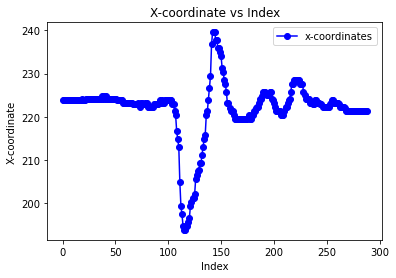

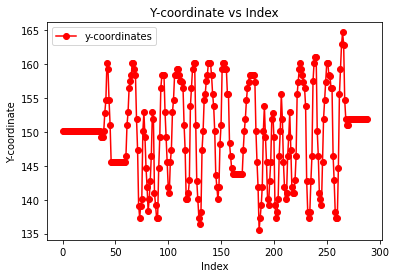

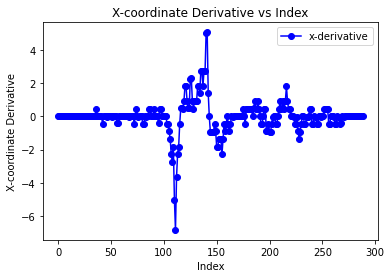

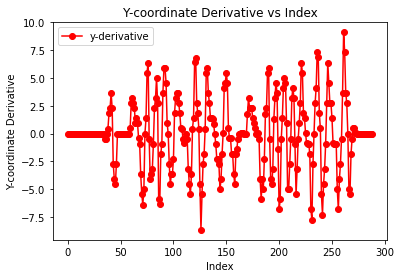

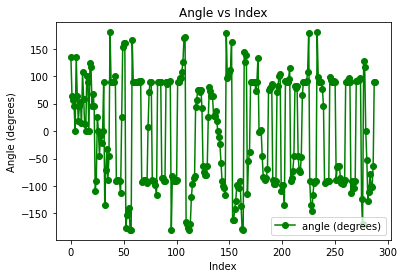

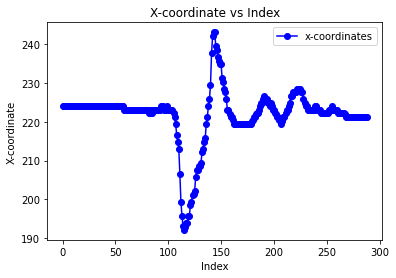

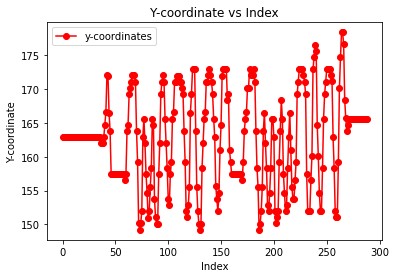

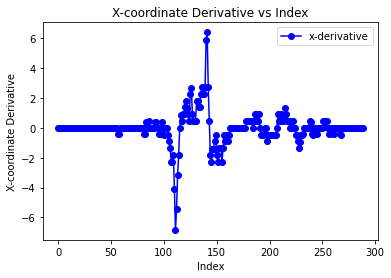

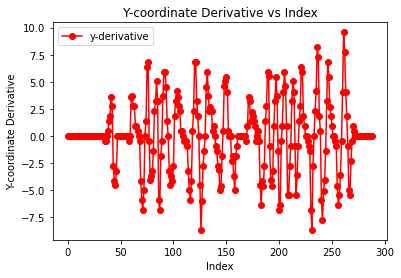

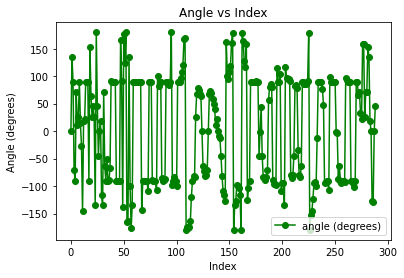

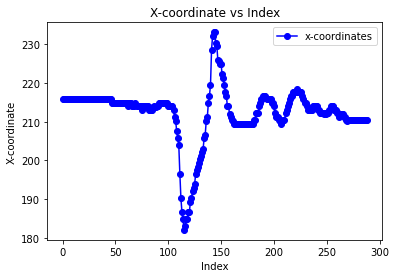

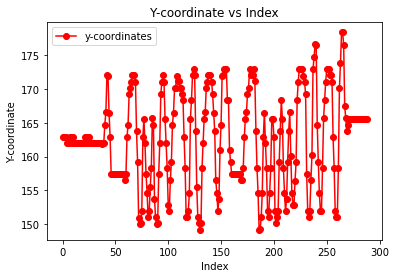

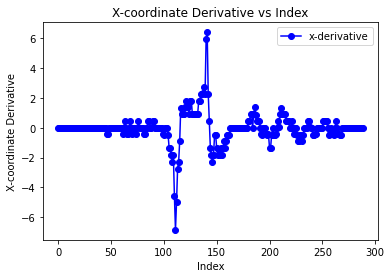

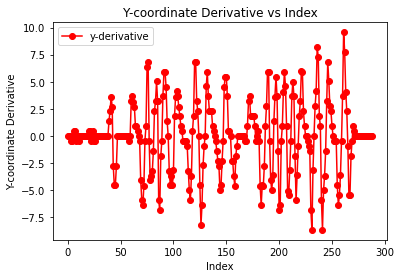

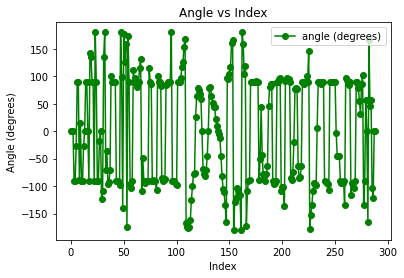

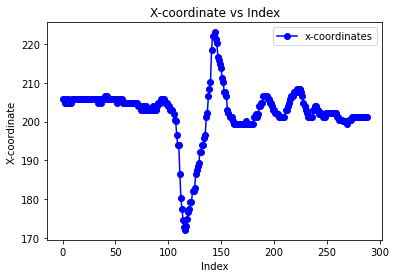

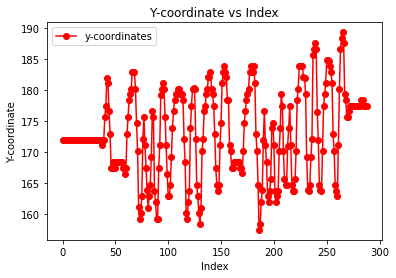

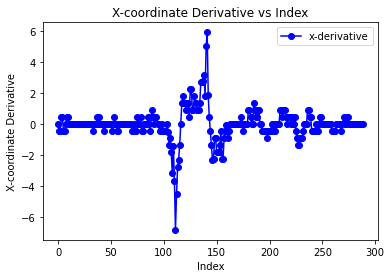

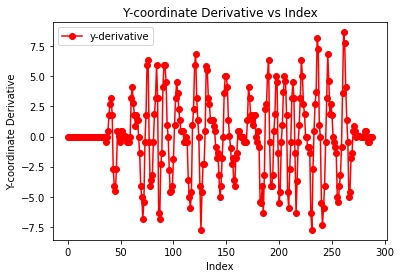

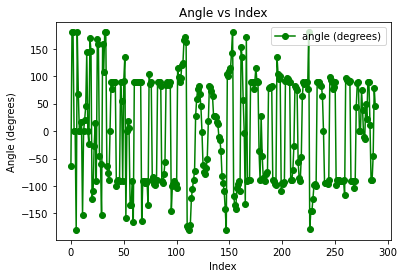

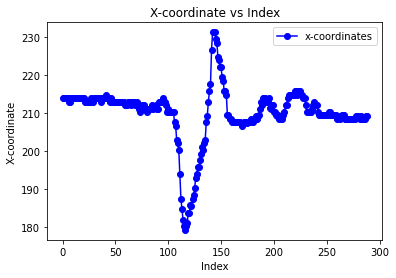

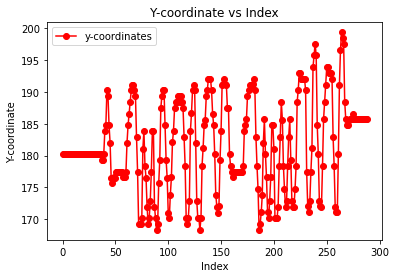

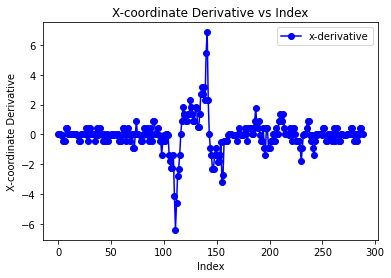

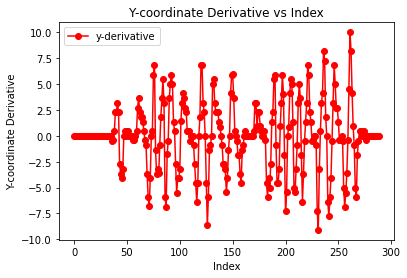

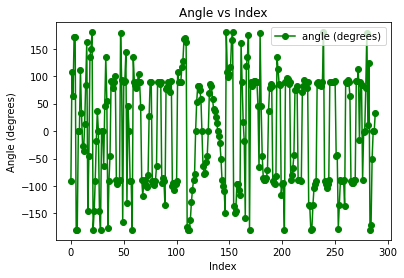

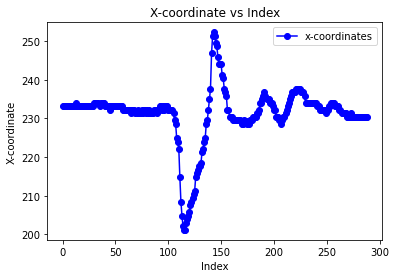

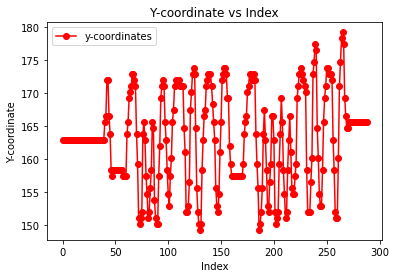

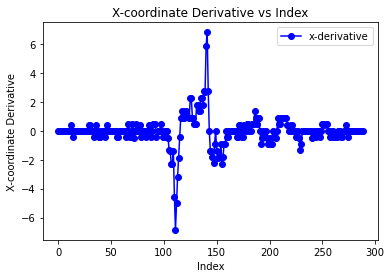

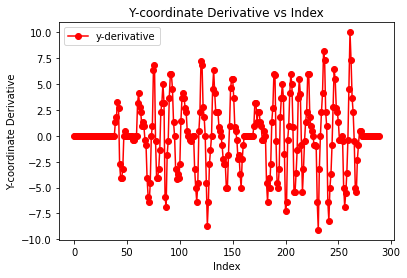

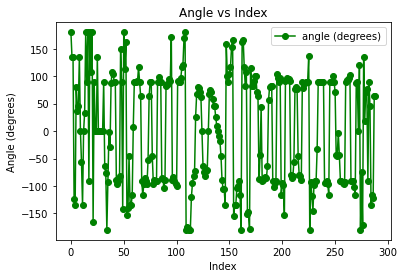

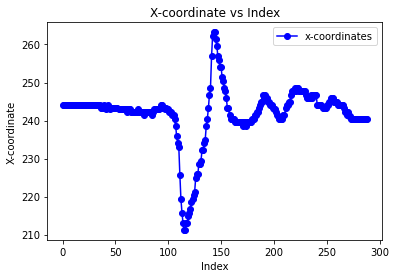

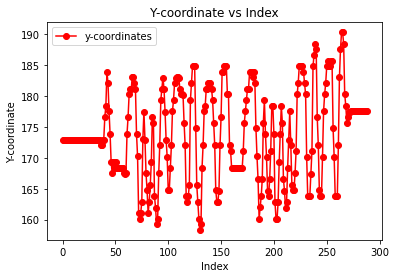

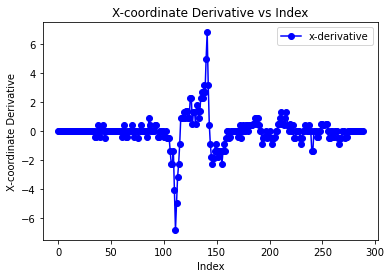

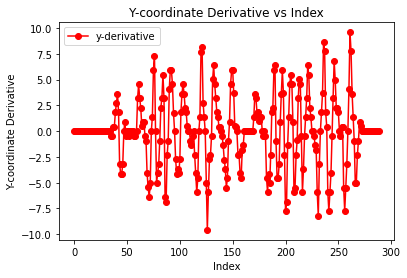

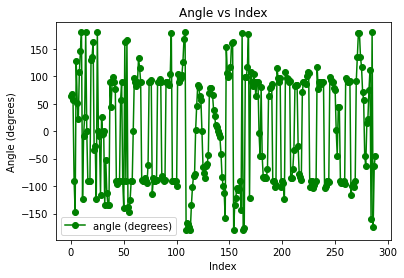

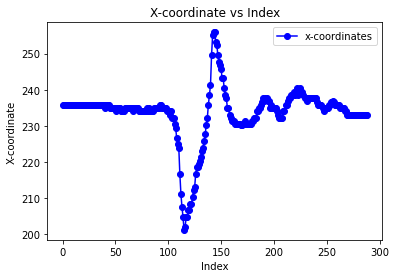

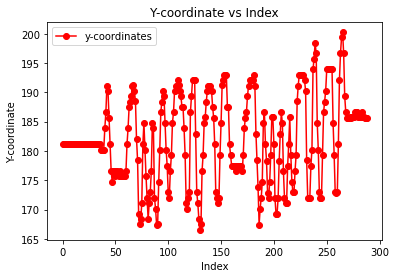

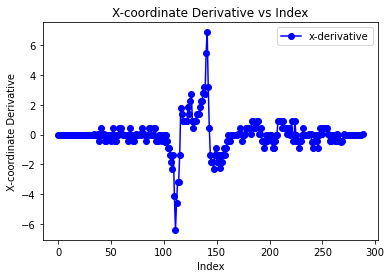

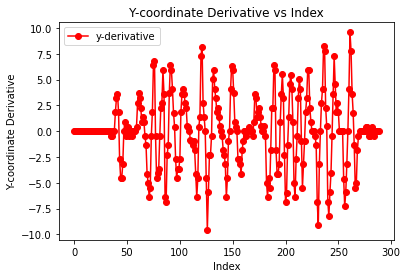

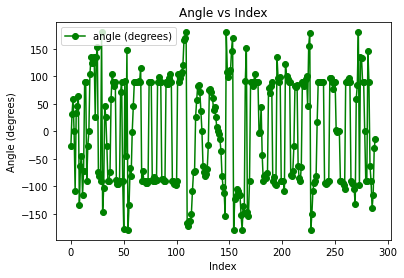

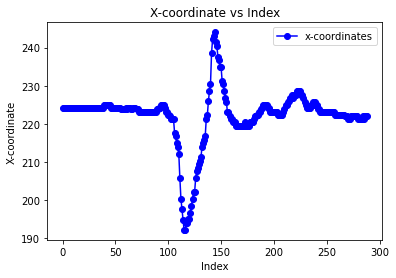

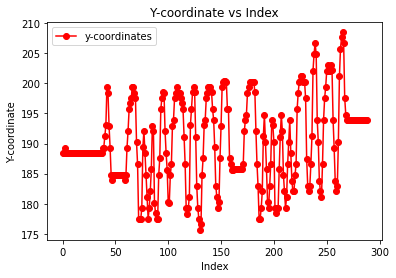

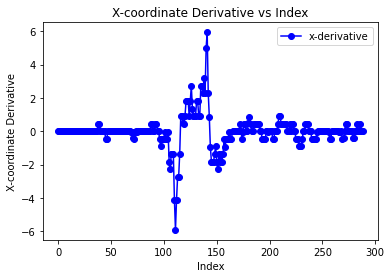

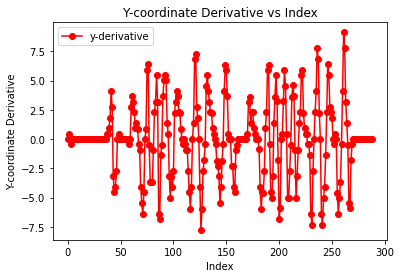

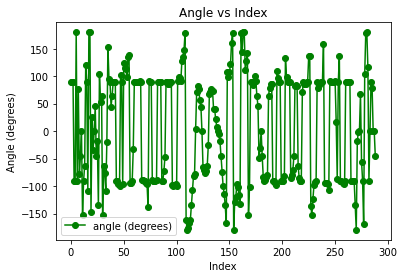

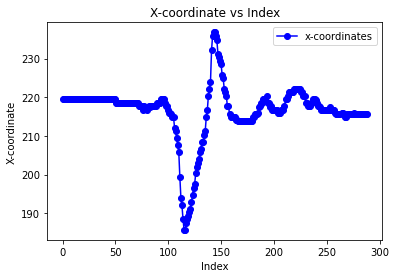

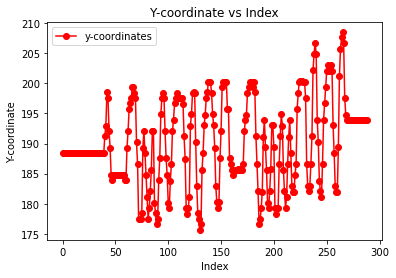

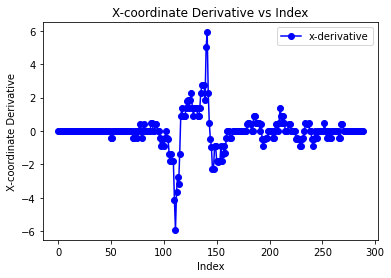

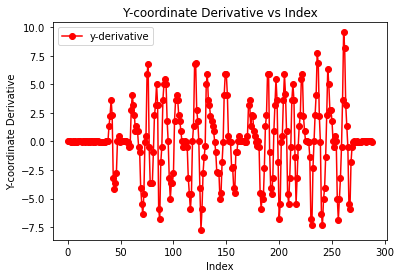

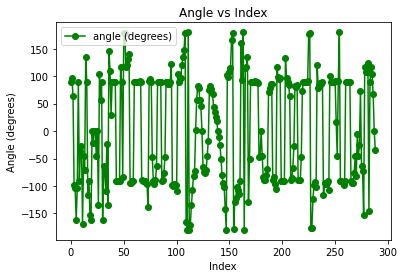

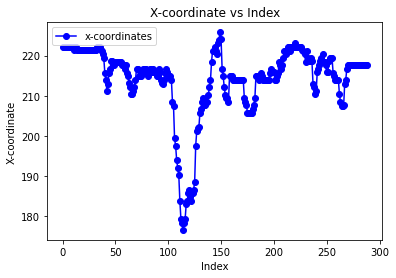

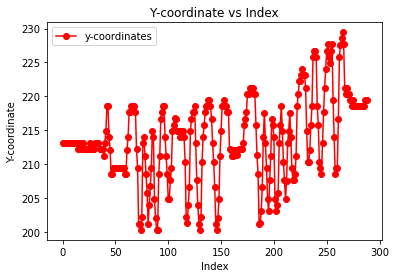

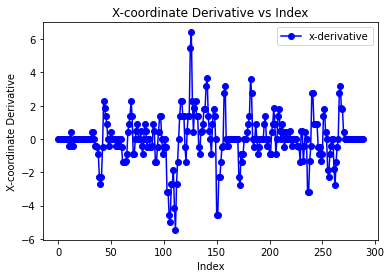

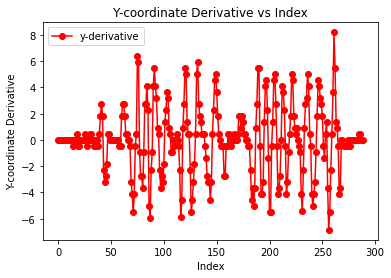

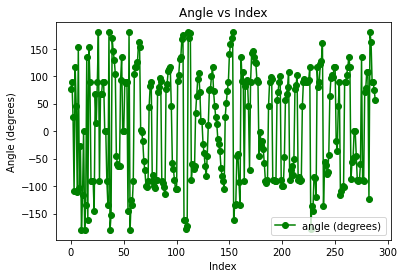

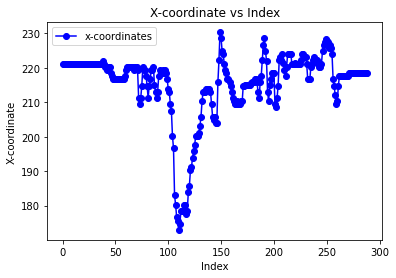

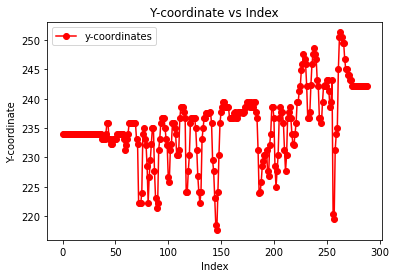

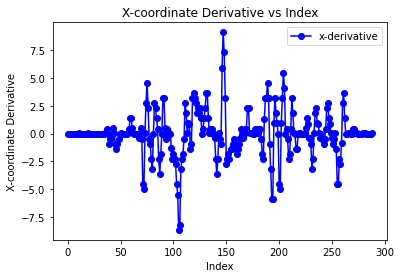

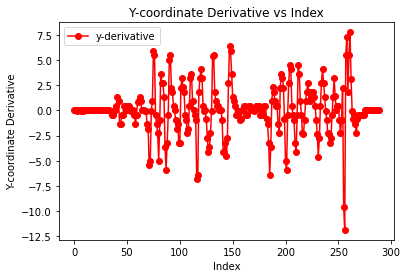

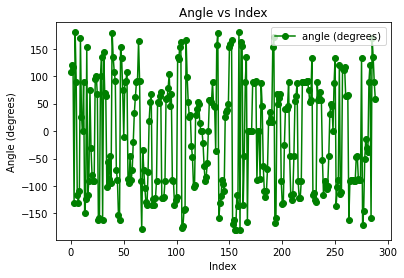

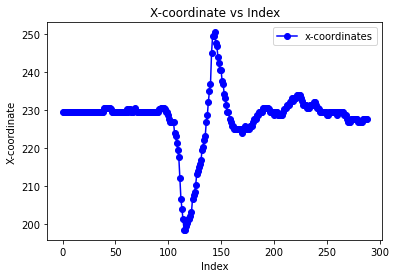

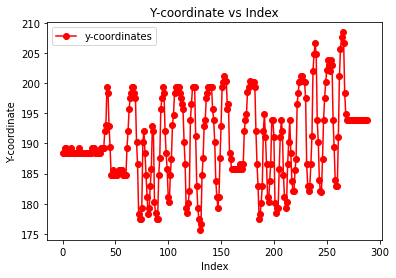

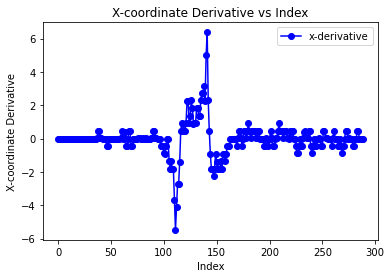

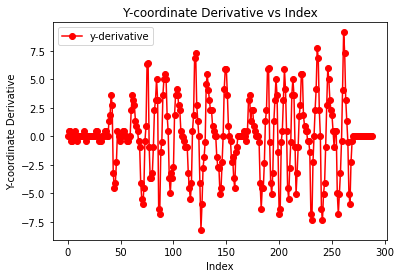

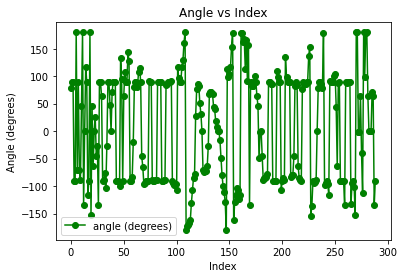

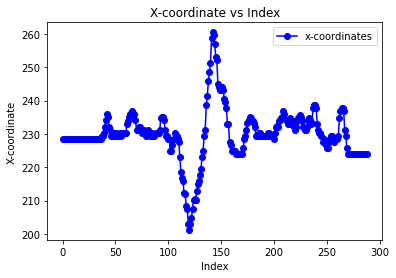

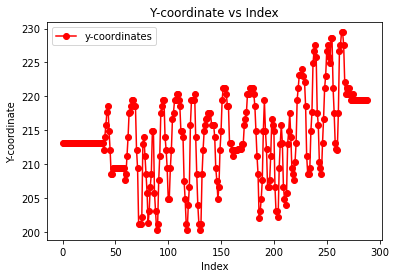

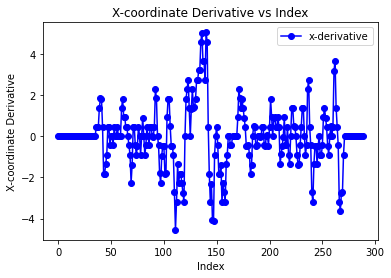

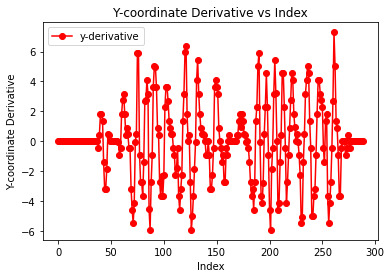

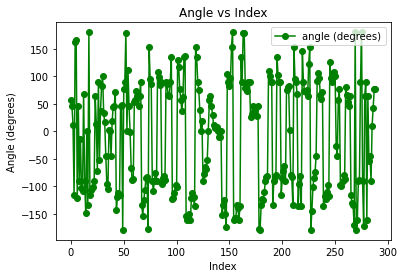

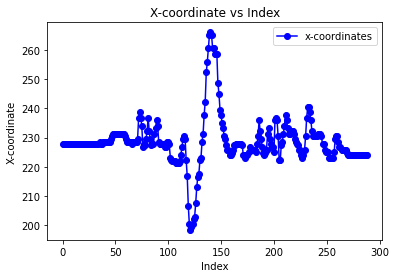

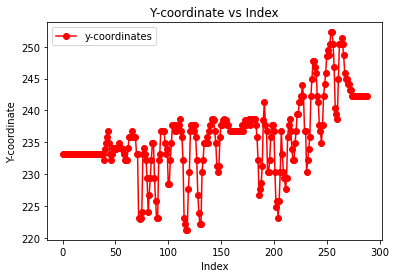

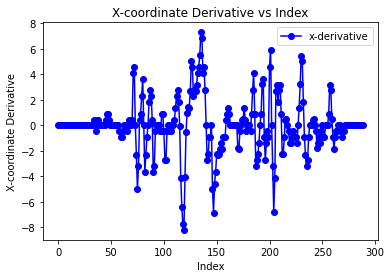

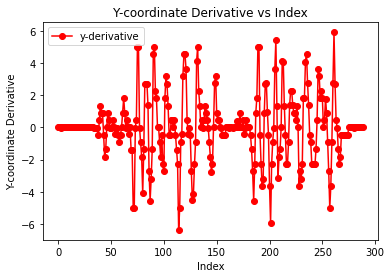

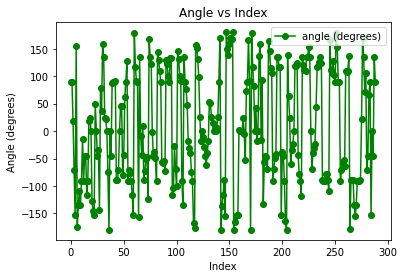

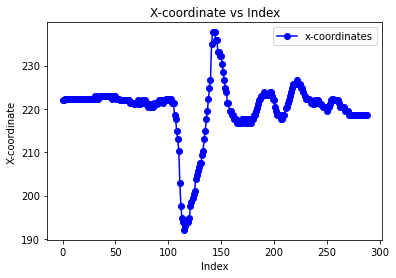

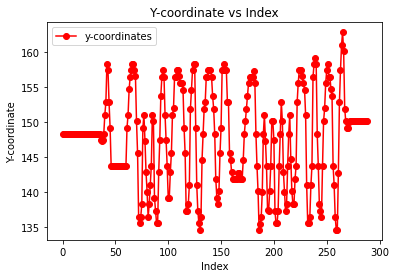

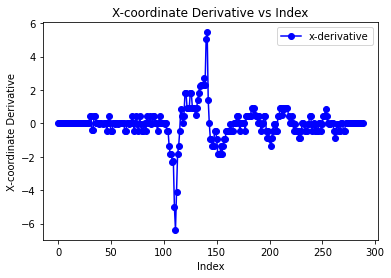

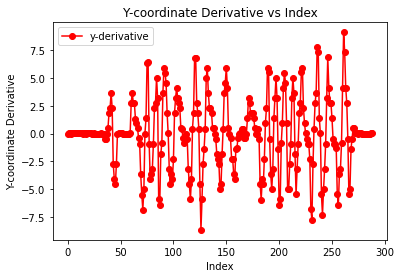

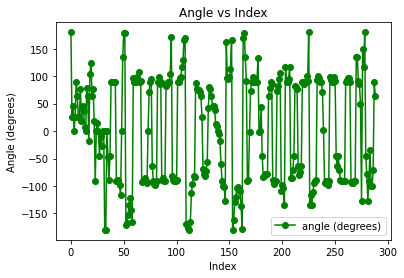

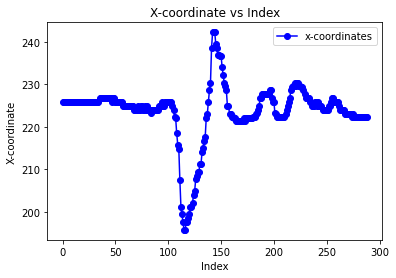

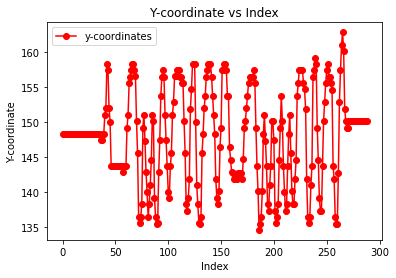

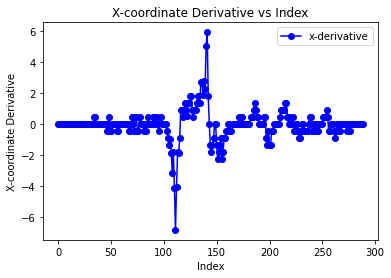

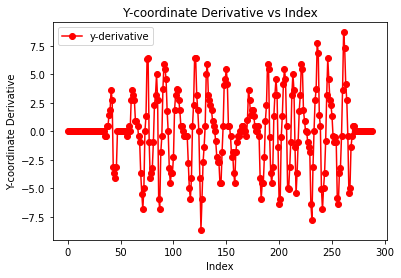

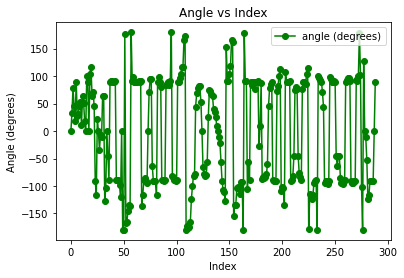

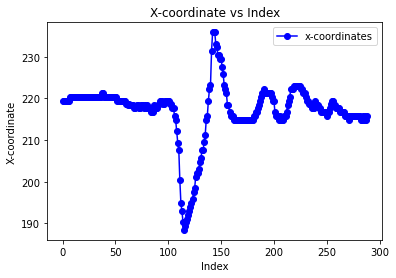

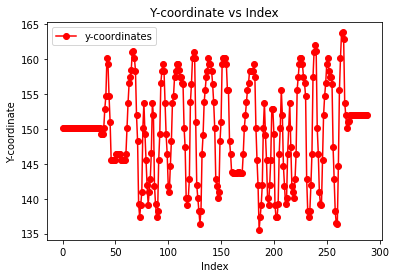

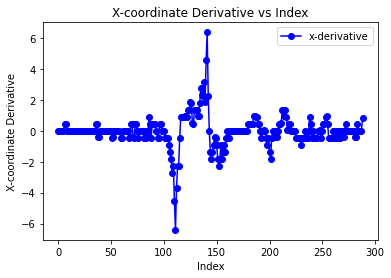

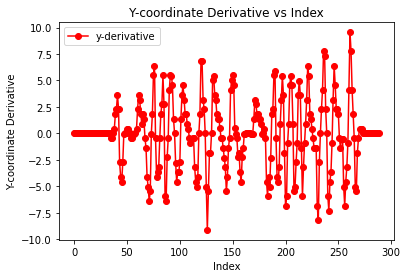

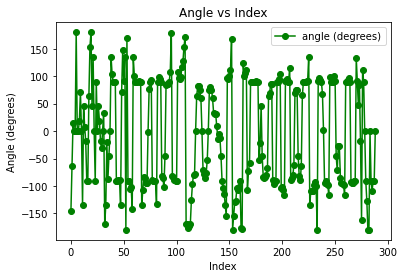

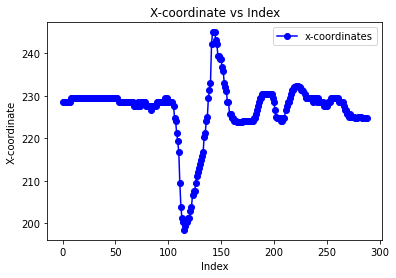

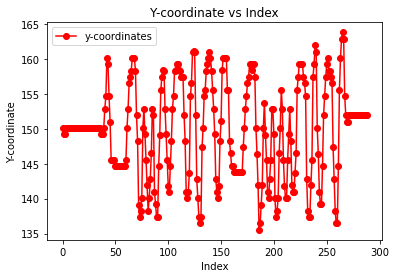

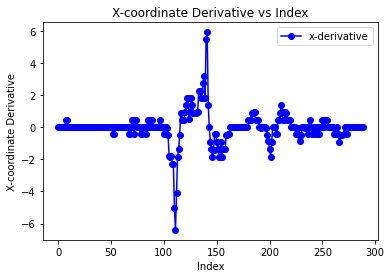

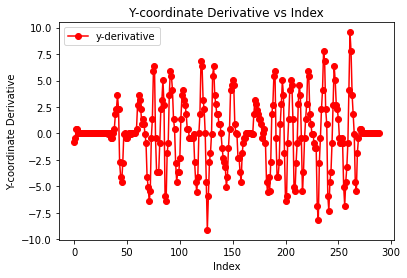

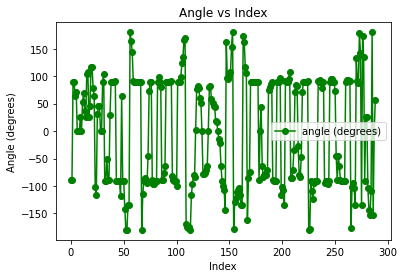

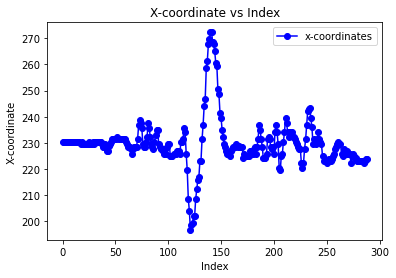

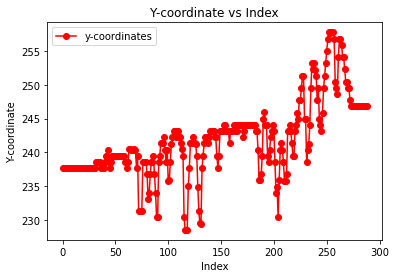

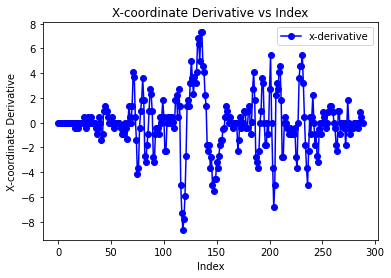

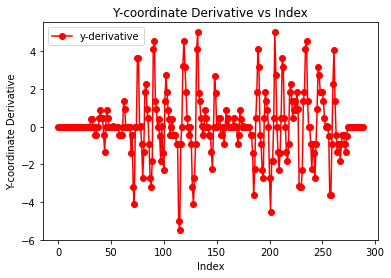

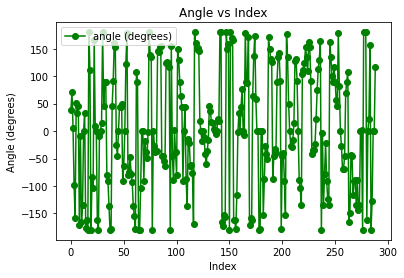

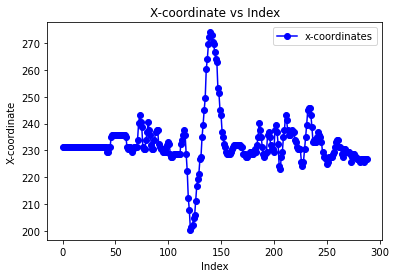

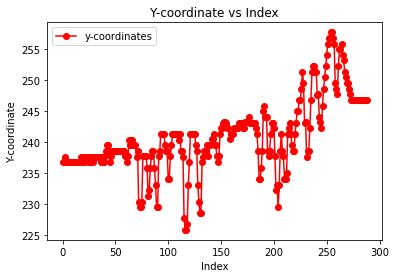

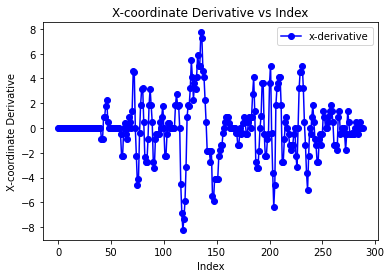

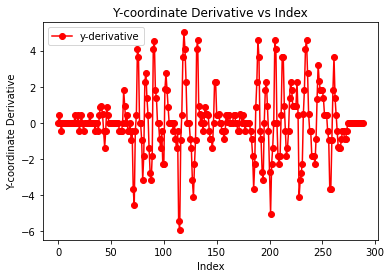

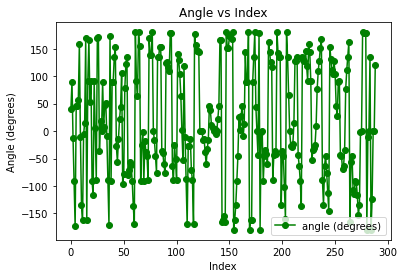

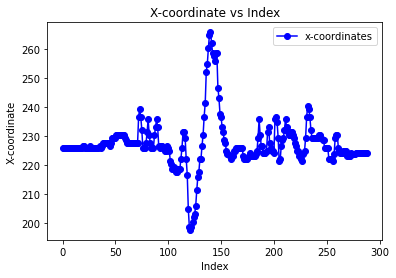

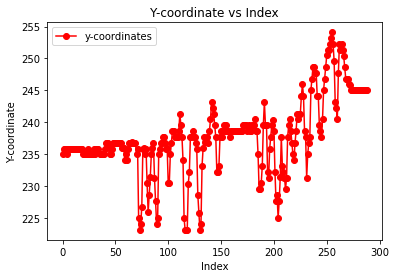

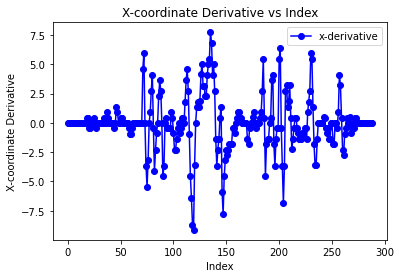

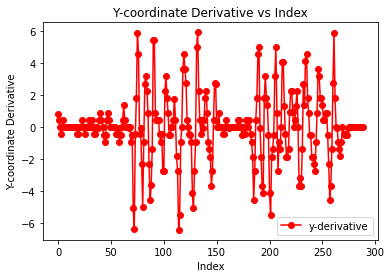

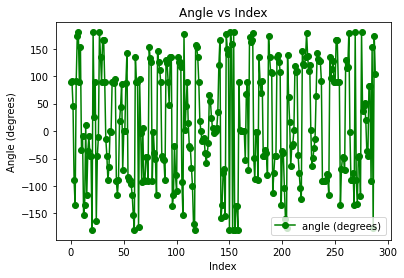

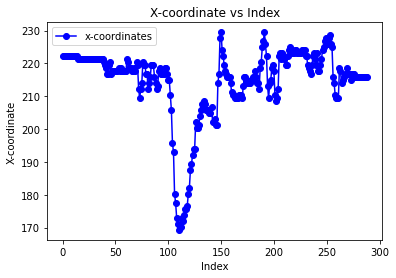

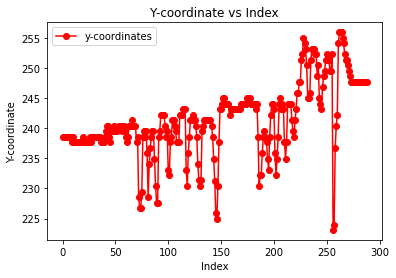

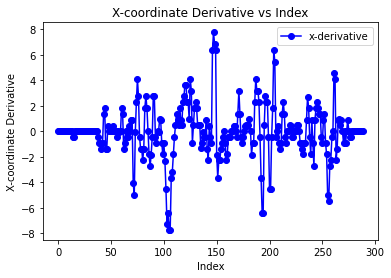

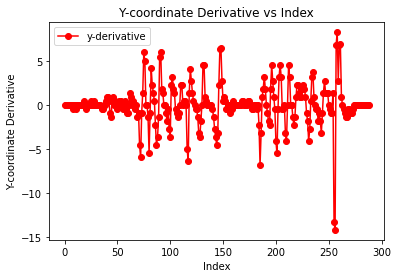

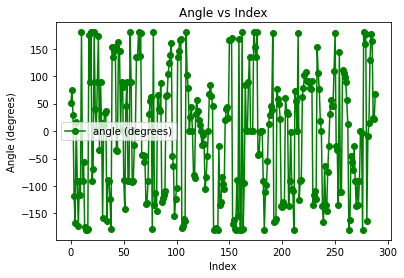

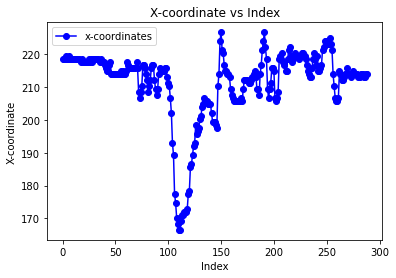

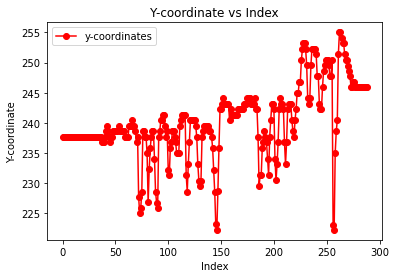

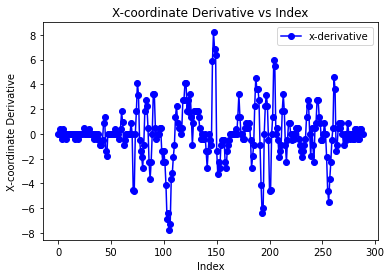

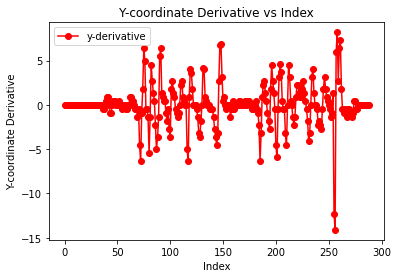

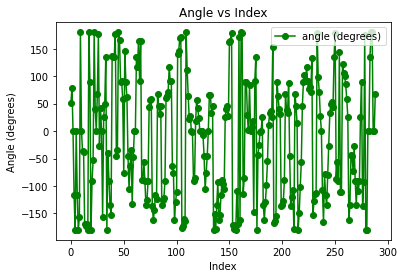

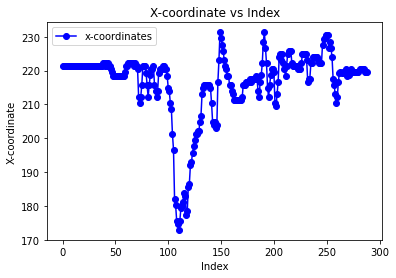

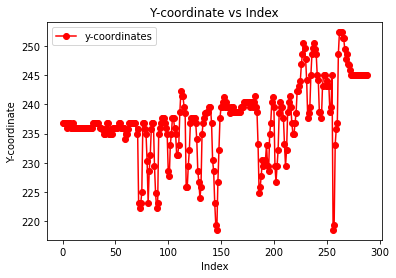

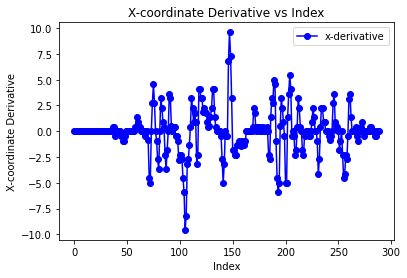

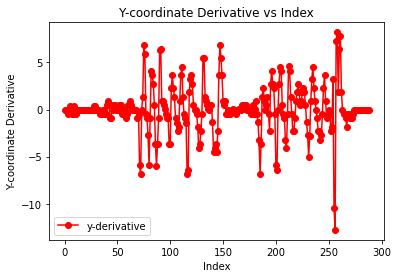

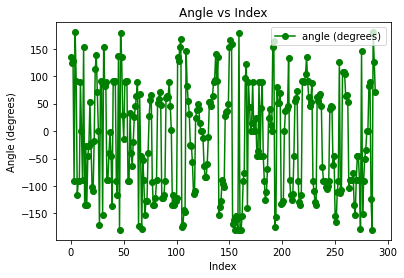

In [72]:
import numpy as np

def calculate_derivatives_and_angles(coordinates):
    # Convert coordinates to numpy array for easier manipulation
    coordinates = np.array(coordinates)

    # Calculate the derivatives
    x_deriv = np.gradient(coordinates[:, 0])
    y_deriv = np.gradient(coordinates[:, 1])

    # Calculate the angles
    angles = np.arctan2(y_deriv, x_deriv)

    # Convert angles to degrees for better interpretation
    angles_deg = np.degrees(angles)

    # Combine derivatives and angles into a new 2D array
    derivatives_and_angles = np.column_stack((x_deriv, y_deriv, angles_deg))

    return derivatives_and_angles

for set in reorganized_sets:
    plot_coordinates(set)
    deriv_angles = calculate_derivatives_and_angles(set)
    plot_coordinates_with_derivatives_and_angles(deriv_angles)